In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D

In [5]:
locA = pd.read_csv("data/LocationA.csv")
locB = pd.read_csv("data/LocationB.csv")
locC = pd.read_csv("data/LocationC.csv")
locD = pd.read_csv("data/LocationD.csv")

In [6]:
locA.drop(columns="Unnamed: 0", inplace=True)
locB.drop(columns="Unnamed: 0", inplace=True)
locC.drop(columns="Unnamed: 0", inplace=True)
locD.drop(columns="Unnamed: 0", inplace=True)

In [7]:
locA

,Date,TempA,pHA,ECA,DOA,BODA,TNA
0,12/15/2021,21.50,7.73,1748,2.55,27.96,1.28
1,12/16/2021,21.21,7.82,1765,2.60,27.90,1.08
2,12/17/2021,21.21,7.73,1769,2.59,27.88,1.17
3,12/18/2021,21.26,7.82,1776,2.63,27.66,1.15
4,12/19/2021,21.09,7.76,1822,2.60,27.71,1.22
...,...,...,...,...,...,...,...
360,12/10/2022,21.70,7.71,1642,2.45,27.90,1.28
361,12/11/2022,21.86,7.72,1640,2.42,28.19,1.29
362,12/12/2022,21.67,7.74,1650,2.43,28.12,1.31
363,12/13/2022,21.66,7.72,1645,2.43,27.89,1.27


In [8]:
locA = locA.set_index("Date")

<AxesSubplot:ylabel='Frequency'>

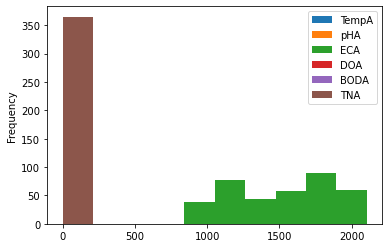

In [9]:
locA.plot(kind="hist")

<AxesSubplot:xlabel='Date'>

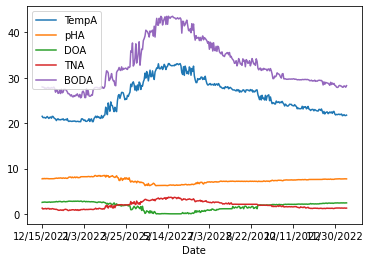

In [10]:
locA[["TempA", "pHA", "DOA", "TNA", "BODA"]].plot()

<AxesSubplot:xlabel='Date'>

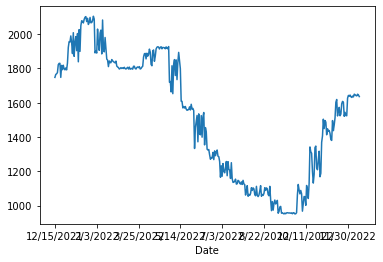

In [11]:
locA["ECA"].plot()

In [19]:
locB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   TempB   365 non-null    float64
 2   pHB     365 non-null    float64
 3   ECB     365 non-null    int64  
 4   DOB     365 non-null    float64
 5   BODB    365 non-null    float64
 6   TNB     365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [29]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [33]:
from sklearn.model_selection import train_test_split

In [66]:
tempA = locA["DOA"]
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(tempA, WINDOW_SIZE)
X1.shape, y1.shape

((362, 3, 1), (362,))

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X1,y1, test_size=0.25, random_state=0)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

### LSTM

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((3, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [71]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [72]:
model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
1/8 [==>...........................] - ETA: 8s - loss: 2.7661 - root_mean_squared_error: 1.6632

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 459ms/step - loss: 2.7834 - root_mean_squared_error: 1.6684 - val_loss: 2.4029 - val_root_mean_squared_error: 1.5501
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 2.6000 - root_mean_squared_error: 1.6125

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 355ms/step - loss: 2.6778 - root_mean_squared_error: 1.6364 - val_loss: 2.3078 - val_root_mean_squared_error: 1.5192
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 2.5800 - root_mean_squared_error: 1.6062

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 372ms/step - loss: 2.5679 - root_mean_squared_error: 1.6025 - val_loss: 2.2117 - val_root_mean_squared_error: 1.4872
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 2.3731 - root_mean_squared_error: 1.5405

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 428ms/step - loss: 2.4619 - root_mean_squared_error: 1.5690 - val_loss: 2.1146 - val_root_mean_squared_error: 1.4542
Epoch 5/100
1/8 [==>...........................] - ETA: 0s - loss: 2.3882 - root_mean_squared_error: 1.5454

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 428ms/step - loss: 2.3527 - root_mean_squared_error: 1.5339 - val_loss: 2.0193 - val_root_mean_squared_error: 1.4210
Epoch 6/100
1/8 [==>...........................] - ETA: 0s - loss: 2.5617 - root_mean_squared_error: 1.6005

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 355ms/step - loss: 2.2459 - root_mean_squared_error: 1.4986 - val_loss: 1.9247 - val_root_mean_squared_error: 1.3873
Epoch 7/100
1/8 [==>...........................] - ETA: 0s - loss: 2.3236 - root_mean_squared_error: 1.5243

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 526ms/step - loss: 2.1387 - root_mean_squared_error: 1.4624 - val_loss: 1.8301 - val_root_mean_squared_error: 1.3528
Epoch 8/100
1/8 [==>...........................] - ETA: 0s - loss: 1.7192 - root_mean_squared_error: 1.3112

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 505ms/step - loss: 2.0324 - root_mean_squared_error: 1.4256 - val_loss: 1.7363 - val_root_mean_squared_error: 1.3177
Epoch 9/100
1/8 [==>...........................] - ETA: 0s - loss: 2.4089 - root_mean_squared_error: 1.5521

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 402ms/step - loss: 1.9288 - root_mean_squared_error: 1.3888 - val_loss: 1.6415 - val_root_mean_squared_error: 1.2812
Epoch 10/100
1/8 [==>...........................] - ETA: 0s - loss: 2.0463 - root_mean_squared_error: 1.4305

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 501ms/step - loss: 1.8216 - root_mean_squared_error: 1.3496 - val_loss: 1.5482 - val_root_mean_squared_error: 1.2443
Epoch 11/100
1/8 [==>...........................] - ETA: 0s - loss: 1.7144 - root_mean_squared_error: 1.3094

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 367ms/step - loss: 1.7158 - root_mean_squared_error: 1.3099 - val_loss: 1.4571 - val_root_mean_squared_error: 1.2071
Epoch 12/100
1/8 [==>...........................] - ETA: 0s - loss: 1.8260 - root_mean_squared_error: 1.3513

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 429ms/step - loss: 1.6129 - root_mean_squared_error: 1.2700 - val_loss: 1.3645 - val_root_mean_squared_error: 1.1681
Epoch 13/100
1/8 [==>...........................] - ETA: 0s - loss: 1.3253 - root_mean_squared_error: 1.1512

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 398ms/step - loss: 1.5087 - root_mean_squared_error: 1.2283 - val_loss: 1.2722 - val_root_mean_squared_error: 1.1279
Epoch 14/100
1/8 [==>...........................] - ETA: 0s - loss: 1.3472 - root_mean_squared_error: 1.1607

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 377ms/step - loss: 1.4032 - root_mean_squared_error: 1.1846 - val_loss: 1.1796 - val_root_mean_squared_error: 1.0861
Epoch 15/100
1/8 [==>...........................] - ETA: 0s - loss: 1.4880 - root_mean_squared_error: 1.2198

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 520ms/step - loss: 1.2994 - root_mean_squared_error: 1.1399 - val_loss: 1.0883 - val_root_mean_squared_error: 1.0432
Epoch 16/100
1/8 [==>...........................] - ETA: 0s - loss: 1.2702 - root_mean_squared_error: 1.1270

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 447ms/step - loss: 1.1973 - root_mean_squared_error: 1.0942 - val_loss: 0.9971 - val_root_mean_squared_error: 0.9986
Epoch 17/100
1/8 [==>...........................] - ETA: 0s - loss: 0.9567 - root_mean_squared_error: 0.9781

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 372ms/step - loss: 1.0924 - root_mean_squared_error: 1.0452 - val_loss: 0.9084 - val_root_mean_squared_error: 0.9531
Epoch 18/100
1/8 [==>...........................] - ETA: 0s - loss: 0.8818 - root_mean_squared_error: 0.9391

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 456ms/step - loss: 0.9944 - root_mean_squared_error: 0.9972 - val_loss: 0.8189 - val_root_mean_squared_error: 0.9049
Epoch 19/100
1/8 [==>...........................] - ETA: 0s - loss: 0.9521 - root_mean_squared_error: 0.9757

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 362ms/step - loss: 0.8977 - root_mean_squared_error: 0.9475 - val_loss: 0.7359 - val_root_mean_squared_error: 0.8579
Epoch 20/100
1/8 [==>...........................] - ETA: 0s - loss: 0.8771 - root_mean_squared_error: 0.9366

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 422ms/step - loss: 0.8038 - root_mean_squared_error: 0.8966 - val_loss: 0.6562 - val_root_mean_squared_error: 0.8101
Epoch 21/100
1/8 [==>...........................] - ETA: 0s - loss: 0.8136 - root_mean_squared_error: 0.9020

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 426ms/step - loss: 0.7150 - root_mean_squared_error: 0.8456 - val_loss: 0.5798 - val_root_mean_squared_error: 0.7614
Epoch 22/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6353 - root_mean_squared_error: 0.7971

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 350ms/step - loss: 0.6299 - root_mean_squared_error: 0.7937 - val_loss: 0.5061 - val_root_mean_squared_error: 0.7114
Epoch 23/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4958 - root_mean_squared_error: 0.7042

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 404ms/step - loss: 0.5491 - root_mean_squared_error: 0.7410 - val_loss: 0.4388 - val_root_mean_squared_error: 0.6624
Epoch 24/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3619 - root_mean_squared_error: 0.6016

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 349ms/step - loss: 0.4749 - root_mean_squared_error: 0.6891 - val_loss: 0.3768 - val_root_mean_squared_error: 0.6139
Epoch 25/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4111 - root_mean_squared_error: 0.6412

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 347ms/step - loss: 0.4071 - root_mean_squared_error: 0.6381 - val_loss: 0.3196 - val_root_mean_squared_error: 0.5653
Epoch 26/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3537 - root_mean_squared_error: 0.5947

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 407ms/step - loss: 0.3453 - root_mean_squared_error: 0.5876 - val_loss: 0.2669 - val_root_mean_squared_error: 0.5166
Epoch 27/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3858 - root_mean_squared_error: 0.6212

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 394ms/step - loss: 0.2903 - root_mean_squared_error: 0.5388 - val_loss: 0.2206 - val_root_mean_squared_error: 0.4697
Epoch 28/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2031 - root_mean_squared_error: 0.4507

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 345ms/step - loss: 0.2399 - root_mean_squared_error: 0.4898 - val_loss: 0.1818 - val_root_mean_squared_error: 0.4263
Epoch 29/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2201 - root_mean_squared_error: 0.4692

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 409ms/step - loss: 0.1987 - root_mean_squared_error: 0.4457 - val_loss: 0.1487 - val_root_mean_squared_error: 0.3856
Epoch 30/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1826 - root_mean_squared_error: 0.4273

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 348ms/step - loss: 0.1641 - root_mean_squared_error: 0.4051 - val_loss: 0.1211 - val_root_mean_squared_error: 0.3479
Epoch 31/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1715 - root_mean_squared_error: 0.4141

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 343ms/step - loss: 0.1351 - root_mean_squared_error: 0.3676 - val_loss: 0.0983 - val_root_mean_squared_error: 0.3136
Epoch 32/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1175 - root_mean_squared_error: 0.3427

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 412ms/step - loss: 0.1116 - root_mean_squared_error: 0.3340 - val_loss: 0.0806 - val_root_mean_squared_error: 0.2839
Epoch 33/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0929 - root_mean_squared_error: 0.3048

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 344ms/step - loss: 0.0934 - root_mean_squared_error: 0.3056 - val_loss: 0.0665 - val_root_mean_squared_error: 0.2579
Epoch 34/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1043 - root_mean_squared_error: 0.3229

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 396ms/step - loss: 0.0790 - root_mean_squared_error: 0.2811 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2350
Epoch 35/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0721 - root_mean_squared_error: 0.2686

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 349ms/step - loss: 0.0677 - root_mean_squared_error: 0.2602 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2168
Epoch 36/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0590 - root_mean_squared_error: 0.2429

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 348ms/step - loss: 0.0593 - root_mean_squared_error: 0.2436 - val_loss: 0.0409 - val_root_mean_squared_error: 0.2023
Epoch 37/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0551 - root_mean_squared_error: 0.2347

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 423ms/step - loss: 0.0533 - root_mean_squared_error: 0.2309 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1917
Epoch 38/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0814 - root_mean_squared_error: 0.2853

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 356ms/step - loss: 0.0497 - root_mean_squared_error: 0.2228 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838
Epoch 39/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0434 - root_mean_squared_error: 0.2083

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 376ms/step - loss: 0.0467 - root_mean_squared_error: 0.2161 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1786
Epoch 40/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1913

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 413ms/step - loss: 0.0449 - root_mean_squared_error: 0.2120 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1752
Epoch 41/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0209 - root_mean_squared_error: 0.1446

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 343ms/step - loss: 0.0438 - root_mean_squared_error: 0.2092 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1728
Epoch 42/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0250 - root_mean_squared_error: 0.1581

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 400ms/step - loss: 0.0431 - root_mean_squared_error: 0.2076 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1710
Epoch 43/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0403 - root_mean_squared_error: 0.2007

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 347ms/step - loss: 0.0425 - root_mean_squared_error: 0.2061 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1699
Epoch 44/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0355 - root_mean_squared_error: 0.1885

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0421 - root_mean_squared_error: 0.2053 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1691
Epoch 45/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0393 - root_mean_squared_error: 0.1983

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 413ms/step - loss: 0.0419 - root_mean_squared_error: 0.2046 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1684
Epoch 46/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0318 - root_mean_squared_error: 0.1782

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 351ms/step - loss: 0.0416 - root_mean_squared_error: 0.2040 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1678
Epoch 47/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0300 - root_mean_squared_error: 0.1732

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 356ms/step - loss: 0.0415 - root_mean_squared_error: 0.2037 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1673
Epoch 48/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0480 - root_mean_squared_error: 0.2192

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 493ms/step - loss: 0.0413 - root_mean_squared_error: 0.2032 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1669
Epoch 49/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0326 - root_mean_squared_error: 0.1806

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 351ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 50/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0369 - root_mean_squared_error: 0.1920

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 394ms/step - loss: 0.0410 - root_mean_squared_error: 0.2024 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1660
Epoch 51/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1294

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 418ms/step - loss: 0.0408 - root_mean_squared_error: 0.2020 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 52/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0269 - root_mean_squared_error: 0.1641

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 348ms/step - loss: 0.0406 - root_mean_squared_error: 0.2016 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1651
Epoch 53/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0241 - root_mean_squared_error: 0.1551

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 408ms/step - loss: 0.0404 - root_mean_squared_error: 0.2011 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1647
Epoch 54/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0247 - root_mean_squared_error: 0.1571

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 371ms/step - loss: 0.0403 - root_mean_squared_error: 0.2006 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1643
Epoch 55/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1833

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0401 - root_mean_squared_error: 0.2002 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1638
Epoch 56/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0517 - root_mean_squared_error: 0.2273

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 414ms/step - loss: 0.0399 - root_mean_squared_error: 0.1998 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1634
Epoch 57/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0302 - root_mean_squared_error: 0.1738

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 349ms/step - loss: 0.0398 - root_mean_squared_error: 0.1995 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1630
Epoch 58/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0324 - root_mean_squared_error: 0.1801

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 349ms/step - loss: 0.0396 - root_mean_squared_error: 0.1990 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1626
Epoch 59/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1325

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 423ms/step - loss: 0.0394 - root_mean_squared_error: 0.1986 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1622
Epoch 60/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0277 - root_mean_squared_error: 0.1664

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 352ms/step - loss: 0.0393 - root_mean_squared_error: 0.1982 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1617
Epoch 61/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0525 - root_mean_squared_error: 0.2290

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 441ms/step - loss: 0.0391 - root_mean_squared_error: 0.1978 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1612
Epoch 62/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0450 - root_mean_squared_error: 0.2122

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 356ms/step - loss: 0.0390 - root_mean_squared_error: 0.1974 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1608
Epoch 63/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0309 - root_mean_squared_error: 0.1759

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 346ms/step - loss: 0.0388 - root_mean_squared_error: 0.1969 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 64/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0560 - root_mean_squared_error: 0.2367

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 418ms/step - loss: 0.0386 - root_mean_squared_error: 0.1966 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1599
Epoch 65/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0436 - root_mean_squared_error: 0.2088

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 348ms/step - loss: 0.0385 - root_mean_squared_error: 0.1962 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1596
Epoch 66/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0598 - root_mean_squared_error: 0.2445

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 349ms/step - loss: 0.0383 - root_mean_squared_error: 0.1957 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1591
Epoch 67/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0307 - root_mean_squared_error: 0.1753

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 414ms/step - loss: 0.0382 - root_mean_squared_error: 0.1954 - val_loss: 0.0252 - val_root_mean_squared_error: 0.1587
Epoch 68/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.1789

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0380 - root_mean_squared_error: 0.1950 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1583
Epoch 69/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1912

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 407ms/step - loss: 0.0379 - root_mean_squared_error: 0.1946 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1579
Epoch 70/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0362 - root_mean_squared_error: 0.1902

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 358ms/step - loss: 0.0377 - root_mean_squared_error: 0.1942 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1575
Epoch 71/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0160 - root_mean_squared_error: 0.1266

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 348ms/step - loss: 0.0375 - root_mean_squared_error: 0.1938 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1571
Epoch 72/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0375 - root_mean_squared_error: 0.1935

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 453ms/step - loss: 0.0374 - root_mean_squared_error: 0.1934 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1567
Epoch 73/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0337 - root_mean_squared_error: 0.1836

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 350ms/step - loss: 0.0372 - root_mean_squared_error: 0.1930 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1564
Epoch 74/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0333 - root_mean_squared_error: 0.1825

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 348ms/step - loss: 0.0371 - root_mean_squared_error: 0.1926 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1560
Epoch 75/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0418 - root_mean_squared_error: 0.2044

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 409ms/step - loss: 0.0369 - root_mean_squared_error: 0.1922 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1556
Epoch 76/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0694 - root_mean_squared_error: 0.2635

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 354ms/step - loss: 0.0368 - root_mean_squared_error: 0.1918 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1552
Epoch 77/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.1888

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 344ms/step - loss: 0.0366 - root_mean_squared_error: 0.1914 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1547
Epoch 78/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0315 - root_mean_squared_error: 0.1775

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 413ms/step - loss: 0.0365 - root_mean_squared_error: 0.1910 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1544
Epoch 79/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1724

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 343ms/step - loss: 0.0363 - root_mean_squared_error: 0.1906 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1539
Epoch 80/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1655

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 398ms/step - loss: 0.0362 - root_mean_squared_error: 0.1903 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1535
Epoch 81/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1654

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 352ms/step - loss: 0.0361 - root_mean_squared_error: 0.1899 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1532
Epoch 82/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0634 - root_mean_squared_error: 0.2518

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 350ms/step - loss: 0.0359 - root_mean_squared_error: 0.1895 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1528
Epoch 83/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0338 - root_mean_squared_error: 0.1839

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 410ms/step - loss: 0.0358 - root_mean_squared_error: 0.1892 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1524
Epoch 84/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0396 - root_mean_squared_error: 0.1991

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 390ms/step - loss: 0.0357 - root_mean_squared_error: 0.1888 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 85/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1575

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 348ms/step - loss: 0.0355 - root_mean_squared_error: 0.1885 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1517
Epoch 86/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0203 - root_mean_squared_error: 0.1426

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 407ms/step - loss: 0.0354 - root_mean_squared_error: 0.1881 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1514
Epoch 87/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0411 - root_mean_squared_error: 0.2028

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 351ms/step - loss: 0.0353 - root_mean_squared_error: 0.1878 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510
Epoch 88/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0497 - root_mean_squared_error: 0.2229

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 424ms/step - loss: 0.0351 - root_mean_squared_error: 0.1874 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507
Epoch 89/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0546 - root_mean_squared_error: 0.2337

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 443ms/step - loss: 0.0350 - root_mean_squared_error: 0.1871 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1504
Epoch 90/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0385 - root_mean_squared_error: 0.1963

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 353ms/step - loss: 0.0349 - root_mean_squared_error: 0.1867 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1500
Epoch 91/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0423 - root_mean_squared_error: 0.2056

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 421ms/step - loss: 0.0347 - root_mean_squared_error: 0.1863 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1497
Epoch 92/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0456 - root_mean_squared_error: 0.2136

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 356ms/step - loss: 0.0346 - root_mean_squared_error: 0.1860 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
Epoch 93/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0390 - root_mean_squared_error: 0.1976

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 350ms/step - loss: 0.0345 - root_mean_squared_error: 0.1857 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1490
Epoch 94/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1214

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 411ms/step - loss: 0.0343 - root_mean_squared_error: 0.1853 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1487
Epoch 95/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0318 - root_mean_squared_error: 0.1782

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 394ms/step - loss: 0.0342 - root_mean_squared_error: 0.1850 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 96/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0415 - root_mean_squared_error: 0.2036

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 413ms/step - loss: 0.0341 - root_mean_squared_error: 0.1846 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1480
Epoch 97/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.1613

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 2s 352ms/step - loss: 0.0340 - root_mean_squared_error: 0.1843 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1477
Epoch 98/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.1332

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 376ms/step - loss: 0.0339 - root_mean_squared_error: 0.1840 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1474
Epoch 99/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0311 - root_mean_squared_error: 0.1762

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 426ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1472
Epoch 100/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0628 - root_mean_squared_error: 0.2505

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 3s 362ms/step - loss: 0.0336 - root_mean_squared_error: 0.1833 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1469


In [73]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [74]:
train_predictions = model1.predict(x_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

8/8 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,0.205925,0.01
1,2.163277,2.17
2,1.818668,0.94
3,1.515939,1.42
4,2.065160,2.09
...,...,...
226,2.400571,2.45
227,2.343791,2.40
228,0.344749,0.07
229,2.061135,2.04


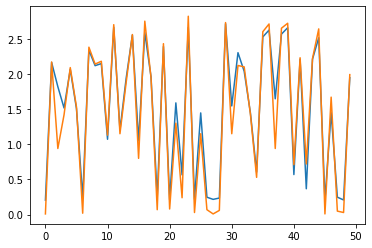

In [78]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actuals'][:50])

In [12]:
from sklearn.model_selection import train_test_split

#### CNN

In [27]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(, 5)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(1,activation='linear'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

SyntaxError: invalid syntax (1518180286.py, line 2)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 271, 32)           512       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 135, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 133, 64)           6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 66, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4224)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [23]:
y_train.shape

(273,)

In [102]:
x_train.shape

TensorShape([1, 273, 5])

In [25]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 502ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 25.3992 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 25.3992 - acc